In [1]:
!pip install pandas nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [3]:
df = pd.read_csv("all_acropolis_reviews.csv")

In [4]:
df.head()

,RATING,REVIEW_TEXT,source_file
0,5.0,We hired a guide for the day which was well wo...,tripadvisor_acropilis_museum.csv
1,5.0,An enjoyable and impressive experience with a ...,tripadvisor_acropilis_museum.csv
2,5.0,"We had a great time here, there is a lot of in...",tripadvisor_acropilis_museum.csv
3,5.0,This museum is so well done! The perfect follo...,tripadvisor_acropilis_museum.csv
4,5.0,The museum is best seen with a guide. Althoug...,tripadvisor_acropilis_museum.csv


## Cleaning the data

In [5]:
df = df.dropna(subset=["REVIEW_TEXT"])

In [6]:
def map_sentiment(rating):
    
    if rating in [4.0, 5.0]:
        return "POSITIVE"
    elif rating == 3.0:
        return "NEUTRAL"
    elif rating in [1.0, 2.0]:
        return "NEGATIVE"
    else:
        return "UNKNOWN"  # handles unexpected or missing values

df["SENTIMENT"] = df["RATING"].apply(map_sentiment)

In [7]:
df

,RATING,REVIEW_TEXT,source_file,SENTIMENT
0,5.0,We hired a guide for the day which was well wo...,tripadvisor_acropilis_museum.csv,POSITIVE
1,5.0,An enjoyable and impressive experience with a ...,tripadvisor_acropilis_museum.csv,POSITIVE
2,5.0,"We had a great time here, there is a lot of in...",tripadvisor_acropilis_museum.csv,POSITIVE
3,5.0,This museum is so well done! The perfect follo...,tripadvisor_acropilis_museum.csv,POSITIVE
4,5.0,The museum is best seen with a guide. Althoug...,tripadvisor_acropilis_museum.csv,POSITIVE
...,...,...,...,...
23083,4.0,"Beautiful museum, beautiful ancient pieces esp...",tripadvisor_acropilis_museum2269.csv,POSITIVE
23084,4.0,I would say that yes you have to go there BUT ...,tripadvisor_acropilis_museum2269.csv,POSITIVE
23085,4.0,It provides detailed explanations of the histo...,tripadvisor_acropilis_museum2269.csv,POSITIVE
23086,4.0,"Nice hike with a view of the Acropolis, especi...",tripadvisor_acropilis_museum2269.csv,POSITIVE


In [8]:
df = df.drop(columns=["source_file"])

In [9]:
df

,RATING,REVIEW_TEXT,SENTIMENT
0,5.0,We hired a guide for the day which was well wo...,POSITIVE
1,5.0,An enjoyable and impressive experience with a ...,POSITIVE
2,5.0,"We had a great time here, there is a lot of in...",POSITIVE
3,5.0,This museum is so well done! The perfect follo...,POSITIVE
4,5.0,The museum is best seen with a guide. Althoug...,POSITIVE
...,...,...,...
23083,4.0,"Beautiful museum, beautiful ancient pieces esp...",POSITIVE
23084,4.0,I would say that yes you have to go there BUT ...,POSITIVE
23085,4.0,It provides detailed explanations of the histo...,POSITIVE
23086,4.0,"Nice hike with a view of the Acropolis, especi...",POSITIVE


In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
def clean_text(text):
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        
        # Use word_tokenize directly without sent_tokenize
        words = text.split()  # Simple tokenization using split
        
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]  # Remove stopwords
        
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
        return " ".join(words)
    else:
        return ""  # Return empty string for non-string inputs

df["CLEAN_REVIEW"] = df["REVIEW_TEXT"].apply(clean_text)

In [12]:
df

,RATING,REVIEW_TEXT,SENTIMENT,CLEAN_REVIEW
0,5.0,We hired a guide for the day which was well wo...,POSITIVE,hired guide day well worth guided u museum poi...
1,5.0,An enjoyable and impressive experience with a ...,POSITIVE,enjoyable impressive experience breathtaking p...
2,5.0,"We had a great time here, there is a lot of in...",POSITIVE,great time lot information every piece descrip...
3,5.0,This museum is so well done! The perfect follo...,POSITIVE,museum well done perfect follow time acropolis...
4,5.0,The museum is best seen with a guide. Althoug...,POSITIVE,museum best seen guide although board rather d...
...,...,...,...,...
23083,4.0,"Beautiful museum, beautiful ancient pieces esp...",POSITIVE,beautiful museum beautiful ancient piece espec...
23084,4.0,I would say that yes you have to go there BUT ...,POSITIVE,would say yes go careful audio guide french ye...
23085,4.0,It provides detailed explanations of the histo...,POSITIVE,provides detailed explanation history architec...
23086,4.0,"Nice hike with a view of the Acropolis, especi...",POSITIVE,nice hike view acropolis especially interested...


In [13]:
import pandas as pd
from IPython.display import display

# Sample one review from each sentiment
positive_example = df[df['SENTIMENT'] == 'POSITIVE'].sample(1)
neutral_example = df[df['SENTIMENT'] == 'NEUTRAL'].sample(1)
negative_example = df[df['SENTIMENT'] == 'NEGATIVE'].sample(1)

# Combine into one DataFrame
results_summary = pd.concat([positive_example, neutral_example, negative_example])

# Select columns to display
results_summary = results_summary[['RATING', 'REVIEW_TEXT', 'SENTIMENT', 'CLEAN_REVIEW']]

# Display with formatting RATING to 1 decimal place
display(
    results_summary.style
    .set_caption("Sample Reviews for Positive, Neutral, and Negative Sentiments")
    .format({'RATING': "{:.1f}"})  # format only the RATING column
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('font-size', '16px'),
            ('text-align', 'center'),
            ('font-weight', 'bold')]
        }
    ])
)

,RATING,REVIEW_TEXT,SENTIMENT,CLEAN_REVIEW
12095,5.0,"This museum is the second best thing to do after visiting Acropolis and this for two reasons. The first because everything that was precious and ancient in the Acropolis has been removed and carefully placed here and second for its amazing architecture and design. It will make for a remarkable journey through old and new and you want regret it. And if you feel hungry while rummaging around, well it has quite a good restaurant for replenishing your strength. Enjoy!",POSITIVE,museum second best thing visiting acropolis two reason first everything precious ancient acropolis removed carefully placed second amazing architecture design make remarkable journey old new want regret feel hungry rummaging around well quite good restaurant replenishing strength enjoy
13679,3.0,Although the museum hosts and displays significant artefacts it still remains a typical exhibition and not an actual storytelling and educative experience.,NEUTRAL,although museum host display significant artefact still remains typical exhibition actual storytelling educative experience
17045,2.0,"modern 3 storey building containg a few artefacts from the acropolis and a lot of empty space, only 5 euros for adults though and free for kids",NEGATIVE,modern storey building containg artefact acropolis lot empty space euro adult though free kid


In [14]:
df = df.drop_duplicates(subset=["CLEAN_REVIEW"])

In [15]:
df

,RATING,REVIEW_TEXT,SENTIMENT,CLEAN_REVIEW
0,5.0,We hired a guide for the day which was well wo...,POSITIVE,hired guide day well worth guided u museum poi...
1,5.0,An enjoyable and impressive experience with a ...,POSITIVE,enjoyable impressive experience breathtaking p...
2,5.0,"We had a great time here, there is a lot of in...",POSITIVE,great time lot information every piece descrip...
3,5.0,This museum is so well done! The perfect follo...,POSITIVE,museum well done perfect follow time acropolis...
4,5.0,The museum is best seen with a guide. Althoug...,POSITIVE,museum best seen guide although board rather d...
...,...,...,...,...
23083,4.0,"Beautiful museum, beautiful ancient pieces esp...",POSITIVE,beautiful museum beautiful ancient piece espec...
23084,4.0,I would say that yes you have to go there BUT ...,POSITIVE,would say yes go careful audio guide french ye...
23085,4.0,It provides detailed explanations of the histo...,POSITIVE,provides detailed explanation history architec...
23086,4.0,"Nice hike with a view of the Acropolis, especi...",POSITIVE,nice hike view acropolis especially interested...


In [16]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Split Test with Naive Bayes, Logistic Regression and Support Vector Machine (SVM)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Load and clean data
df = df.dropna(subset=["REVIEW_TEXT", "SENTIMENT"])
df["REVIEW_TEXT"] = df["REVIEW_TEXT"].astype(str)

# See distribution of sentiment classes
print(df["SENTIMENT"].value_counts())

X = df["REVIEW_TEXT"]
y = df["SENTIMENT"]

SENTIMENT
POSITIVE    21766
NEUTRAL      1018
NEGATIVE      299
Name: count, dtype: int64


### Train-Test Split (80-20 and 70-30)

In [18]:
# Split 80-20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Split 70-30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

### Naive Bayes - 80/20

In [19]:
vectorizer_nb_80 = TfidfVectorizer()
X_train_vec_nb_80 = vectorizer_nb_80.fit_transform(X_train_80)
X_test_vec_nb_20 = vectorizer_nb_80.transform(X_test_20)

model_nb_80 = MultinomialNB()
model_nb_80.fit(X_train_vec_nb_80, y_train_80)
preds_nb_80 = model_nb_80.predict(X_test_vec_nb_20)

print("Naive Bayes 80/20")
print("Accuracy:", accuracy_score(y_test_20, preds_nb_80))
print(classification_report(y_test_20, preds_nb_80))

Naive Bayes 80/20
Accuracy: 0.9397877409573316
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00        52
     NEUTRAL       0.00      0.00      0.00       226
    POSITIVE       0.94      1.00      0.97      4339

    accuracy                           0.94      4617
   macro avg       0.31      0.33      0.32      4617
weighted avg       0.88      0.94      0.91      4617



C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

### Naive Bayes - 70/30

In [20]:
vectorizer_nb_70 = TfidfVectorizer()
X_train_vec_nb_70 = vectorizer_nb_70.fit_transform(X_train_70)
X_test_vec_nb_30 = vectorizer_nb_70.transform(X_test_30)

model_nb_70 = MultinomialNB()
model_nb_70.fit(X_train_vec_nb_70, y_train_70)
preds_nb_70 = model_nb_70.predict(X_test_vec_nb_30)

print("Naive Bayes 70/30")
print("Accuracy:", accuracy_score(y_test_30, preds_nb_70))
print(classification_report(y_test_30, preds_nb_70))

Naive Bayes 70/30
Accuracy: 0.9389169675090253
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00        86
     NEUTRAL       0.00      0.00      0.00       337
    POSITIVE       0.94      1.00      0.97      6502

    accuracy                           0.94      6925
   macro avg       0.31      0.33      0.32      6925
weighted avg       0.88      0.94      0.91      6925



C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

### Logistic Regression - 80/20

In [21]:
vectorizer_lr_80 = TfidfVectorizer()
X_train_vec_lr_80 = vectorizer_lr_80.fit_transform(X_train_80)
X_test_vec_lr_20 = vectorizer_lr_80.transform(X_test_20)

model_lr_80 = LogisticRegression(max_iter=1000)
model_lr_80.fit(X_train_vec_lr_80, y_train_80)
preds_lr_80 = model_lr_80.predict(X_test_vec_lr_20)

print("Logistic Regression 80/20")
print("Accuracy:", accuracy_score(y_test_20, preds_lr_80))
print(classification_report(y_test_20, preds_lr_80))

Logistic Regression 80/20
Accuracy: 0.9430366038553173
              precision    recall  f1-score   support

    NEGATIVE       0.50      0.02      0.04        52
     NEUTRAL       0.55      0.10      0.17       226
    POSITIVE       0.95      1.00      0.97      4339

    accuracy                           0.94      4617
   macro avg       0.66      0.37      0.39      4617
weighted avg       0.92      0.94      0.92      4617



### Logistic Regression - 70/30

In [22]:
vectorizer_lr_70 = TfidfVectorizer()
X_train_vec_lr_70 = vectorizer_lr_70.fit_transform(X_train_70)
X_test_vec_lr_30 = vectorizer_lr_70.transform(X_test_30)

model_lr_70 = LogisticRegression(max_iter=1000)
model_lr_70.fit(X_train_vec_lr_70, y_train_70)
preds_lr_70 = model_lr_70.predict(X_test_vec_lr_30)

print("Logistic Regression 70/30")
print("Accuracy:", accuracy_score(y_test_30, preds_lr_70))
print(classification_report(y_test_30, preds_lr_70))

Logistic Regression 70/30
Accuracy: 0.9409386281588448
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00        86
     NEUTRAL       0.49      0.10      0.16       337
    POSITIVE       0.95      1.00      0.97      6502

    accuracy                           0.94      6925
   macro avg       0.48      0.37      0.38      6925
weighted avg       0.91      0.94      0.92      6925



C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

### SVM - 80/20

In [23]:
vectorizer_svm_80 = TfidfVectorizer()
X_train_vec_svm_80 = vectorizer_svm_80.fit_transform(X_train_80)
X_test_vec_svm_20 = vectorizer_svm_80.transform(X_test_20)

model_svm_80 = LinearSVC()
model_svm_80.fit(X_train_vec_svm_80, y_train_80)
preds_svm_80 = model_svm_80.predict(X_test_vec_svm_20)

print("SVM 80/20")
print("Accuracy:", accuracy_score(y_test_20, preds_svm_80))
print(classification_report(y_test_20, preds_svm_80))

SVM 80/20
Accuracy: 0.944769330734243
              precision    recall  f1-score   support

    NEGATIVE       0.47      0.13      0.21        52
     NEUTRAL       0.53      0.20      0.29       226
    POSITIVE       0.95      0.99      0.97      4339

    accuracy                           0.94      4617
   macro avg       0.65      0.44      0.49      4617
weighted avg       0.93      0.94      0.93      4617



### SVM - 70/30

In [24]:
vectorizer_svm_70 = TfidfVectorizer()
X_train_vec_svm_70 = vectorizer_svm_70.fit_transform(X_train_70)
X_test_vec_svm_30 = vectorizer_svm_70.transform(X_test_30)

model_svm_70 = LinearSVC()
model_svm_70.fit(X_train_vec_svm_70, y_train_70)
preds_svm_70 = model_svm_70.predict(X_test_vec_svm_30)

print("SVM 70/30")
print("Accuracy:", accuracy_score(y_test_30, preds_svm_70))
print(classification_report(y_test_30, preds_svm_70))

SVM 70/30
Accuracy: 0.9420938628158845
              precision    recall  f1-score   support

    NEGATIVE       0.45      0.06      0.10        86
     NEUTRAL       0.49      0.18      0.26       337
    POSITIVE       0.95      0.99      0.97      6502

    accuracy                           0.94      6925
   macro avg       0.63      0.41      0.45      6925
weighted avg       0.92      0.94      0.93      6925



## Model Performances

In [25]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Naive Bayes 80/20", "Naive Bayes 70/30",
        "LogReg 80/20", "LogReg 70/30",
        "SVM 80/20", "SVM 70/30"
    ],
    "Accuracy": [
        accuracy_score(y_test_20, preds_nb_80),
        accuracy_score(y_test_30, preds_nb_70),
        accuracy_score(y_test_20, preds_lr_80),
        accuracy_score(y_test_30, preds_lr_70),
        accuracy_score(y_test_20, preds_svm_80),
        accuracy_score(y_test_30, preds_svm_70),
    ]
})

print(results)

               Model  Accuracy
0  Naive Bayes 80/20  0.939788
1  Naive Bayes 70/30  0.938917
2       LogReg 80/20  0.943037
3       LogReg 70/30  0.940939
4          SVM 80/20  0.944769
5          SVM 70/30  0.942094


## Visualize Class Distribution 

C:\Users\krist\AppData\Local\Temp\ipykernel_12660\1410193422.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SENTIMENT', data=df, palette='coolwarm')


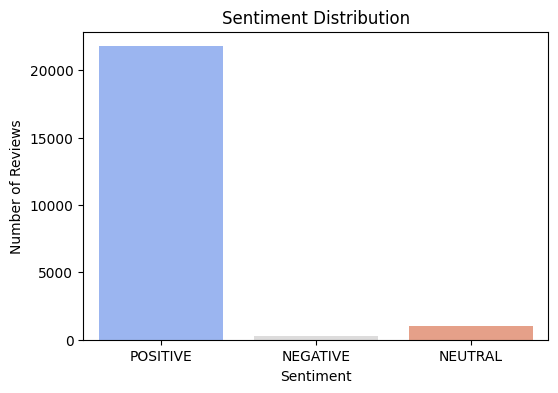

In [26]:
# Use CLEAN_REVIEW column for analysis
X = df['CLEAN_REVIEW']
y = df['SENTIMENT']

# Sentiment distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='SENTIMENT', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.show()

In [27]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# List to store results from all evaluations
results_summary = []

def evaluate_model(model_name, split_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    
    results_summary.append({
        "Model": model_name,
        "Split": split_name,
        "Accuracy": round(accuracy, 4),
        "F1_Positive": round(report.get("POSITIVE", {}).get("f1-score", 0), 4),
        "Precision_Positive": round(report.get("POSITIVE", {}).get("precision", 0), 4),
        "Recall_Positive": round(report.get("POSITIVE", {}).get("recall", 0), 4),

        "F1_Negative": round(report.get("NEGATIVE", {}).get("f1-score", 0), 4),
        "Precision_Negative": round(report.get("NEGATIVE", {}).get("precision", 0), 4),
        "Recall_Negative": round(report.get("NEGATIVE", {}).get("recall", 0), 4),

        "F1_Neutral": round(report.get("NEUTRAL", {}).get("f1-score", 0), 4),
        "Precision_Neutral": round(report.get("NEUTRAL", {}).get("precision", 0), 4),
        "Recall_Neutral": round(report.get("NEUTRAL", {}).get("recall", 0), 4),
    })

In [28]:
evaluate_model("Naive Bayes", "80/20", y_test_20, preds_nb_80)
evaluate_model("Naive Bayes", "70/30", y_test_30, preds_nb_70)

evaluate_model("Logistic Regression", "80/20", y_test_20, preds_lr_80)
evaluate_model("Logistic Regression", "70/30", y_test_30, preds_lr_70)

evaluate_model("SVM", "80/20", y_test_20, preds_svm_80)
evaluate_model("SVM", "70/30", y_test_30, preds_svm_70)

In [29]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
from IPython.display import display

results_df = pd.DataFrame(results_summary)
display(results_df.style.set_caption("Model Evaluation Results").format(precision=4).set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('text-align', 'center'), ('font-weight', 'bold')]}
]))

,Model,Split,Accuracy,F1_Positive,Precision_Positive,Recall_Positive,F1_Negative,Precision_Negative,Recall_Negative,F1_Neutral,Precision_Neutral,Recall_Neutral
0,Naive Bayes,80/20,0.9398,0.9690,0.9398,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,Naive Bayes,70/30,0.9389,0.9685,0.9389,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Logistic Regression,80/20,0.9430,0.9717,0.9469,0.9979,0.0370,0.5000,0.0192,0.1716,0.5476,0.1018
3,Logistic Regression,70/30,0.9409,0.9705,0.9453,0.9971,0.0000,0.0000,0.0000,0.1634,0.4925,0.0979
4,SVM,80/20,0.9448,0.9732,0.9542,0.9931,0.2090,0.4667,0.1346,0.2949,0.5349,0.2035
5,SVM,70/30,0.9421,0.9717,0.9511,0.9932,0.1031,0.4545,0.0581,0.2646,0.4919,0.1810


In [31]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


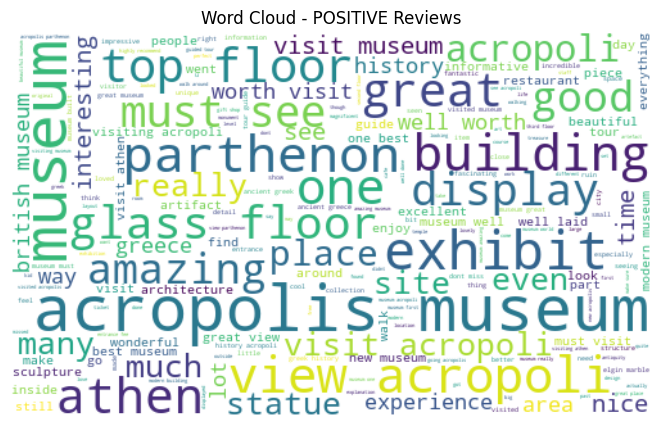

In [32]:
# WordCloud for POSITIVE reviews
from wordcloud import WordCloud

positive_text = ' '.join(df[df['SENTIMENT'] == 'POSITIVE']['CLEAN_REVIEW'])
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - POSITIVE Reviews')
plt.show()

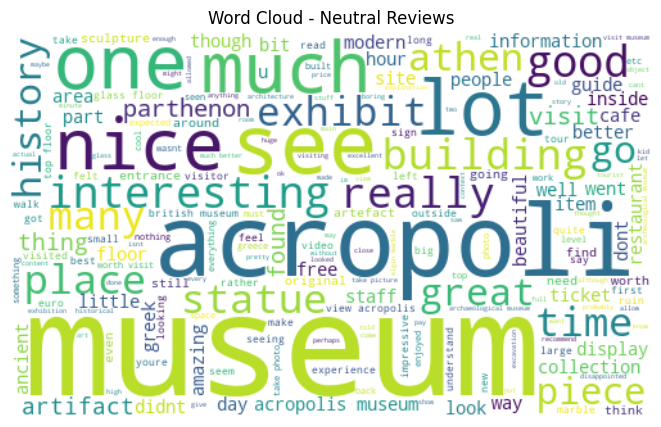

In [33]:
# WordCloud for NEUTRAL reviews
neutral_text = ' '.join(df[df['SENTIMENT'] == 'NEUTRAL']['CLEAN_REVIEW'])
wordcloud_neu = WordCloud(width=500, height=300, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Neutral Reviews')
plt.show()

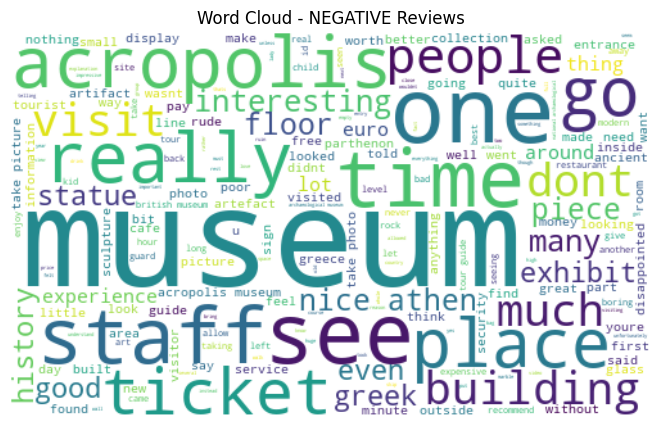

In [34]:
# WordCloud for NEGATIVE reviews
negative_text = ' '.join(df[df['SENTIMENT'] == 'NEGATIVE']['CLEAN_REVIEW'])
wordcloud_neg = WordCloud(width=500, height=300, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - NEGATIVE Reviews')
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_12660\934754298.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(pos_words), palette='Greens_r')


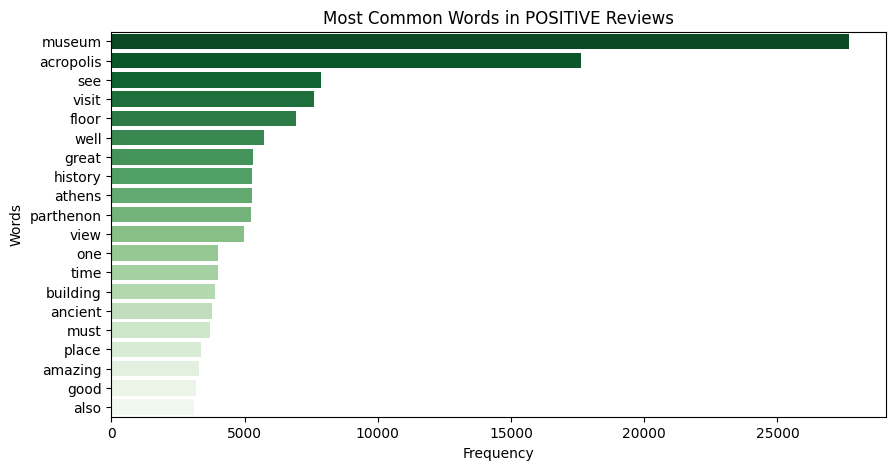

In [35]:
# Identify most common words in POSITIVE reviews
from collections import Counter

positive_words = ' '.join(df[df['SENTIMENT'] == 'POSITIVE']['CLEAN_REVIEW']).split()
common_positive = Counter(positive_words).most_common(20)

# Display as a bar chart
pos_words, freqs = zip(*common_positive)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(pos_words), palette='Greens_r')
plt.title('Most Common Words in POSITIVE Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_12660\1242770338.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(neu_words), palette='Blues_r')


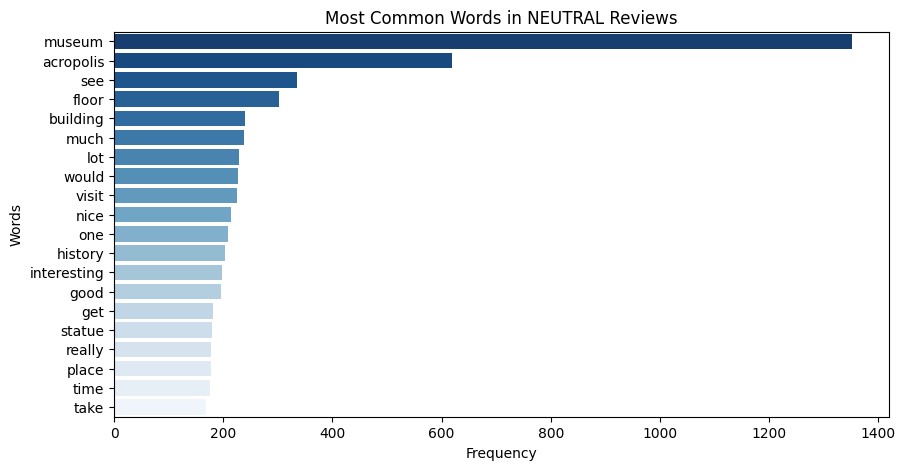

In [36]:
# Identify most common words in NEUTRAL reviews
from collections import Counter

neutral_words = ' '.join(df[df['SENTIMENT'] == 'NEUTRAL']['CLEAN_REVIEW']).split()
common_neutral = Counter(neutral_words).most_common(20)

# Display as a bar chart
neu_words, freqs = zip(*common_neutral)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(neu_words), palette='Blues_r')
plt.title('Most Common Words in NEUTRAL Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

C:\Users\krist\AppData\Local\Temp\ipykernel_12660\198644087.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(neg_words), palette='Reds_r')


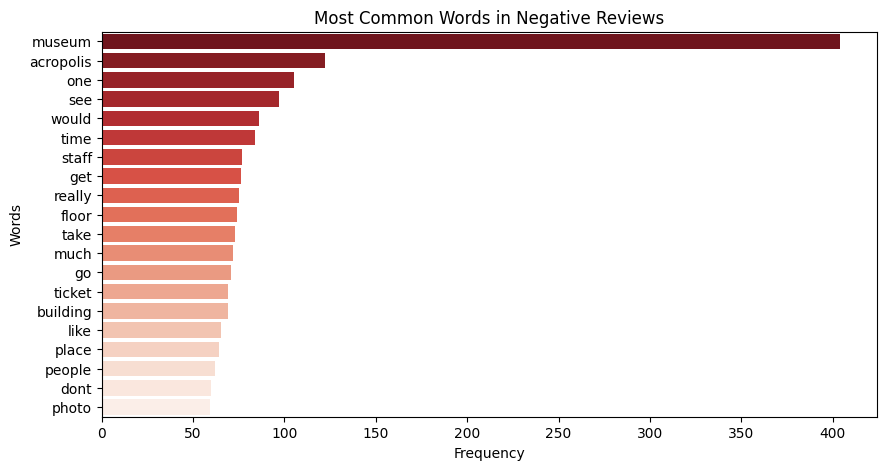

In [37]:
# Identify most common words in NEGATIVE reviews
from collections import Counter

negative_words = ' '.join(df[df['SENTIMENT'] == 'NEGATIVE']['CLEAN_REVIEW']).split()
common_negative = Counter(negative_words).most_common(20)

# Display as a bar chart
neg_words, freqs = zip(*common_negative)
plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(neg_words), palette='Reds_r')
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [44]:
import numpy as np

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer_lr_80.get_feature_names_out()

# Display top predictive words for each sentiment class based on model weights
print("Top Predictive Words per Sentiment (based on Logistic Regression Coefficients)\n")

for i, class_label in enumerate(model_lr_80.classes_):
    # Get indices of the top 10 highest weighted features for this class
    top_indices = np.argsort(model_lr_80.coef_[i])[-10:]
    
    print(f"\n Top words for class: '{class_label.upper()}'")
    print("-" * 40)
    
    # Show words from highest to lowest weight
    for idx in reversed(top_indices):
        word = feature_names[idx]
        weight = model_lr_80.coef_[i][idx]
        print(f"{word:<20} {weight:.3f}")


Top Predictive Words per Sentiment (based on Logistic Regression Coefficients)


 Top words for class: 'NEGATIVE'
----------------------------------------
no                   2.191
nothing              2.096
only                 1.766
staff                1.627
not                  1.612
disappointed         1.559
national             1.502
poor                 1.421
minutes              1.406
boring               1.233

 Top words for class: 'NEUTRAL'
----------------------------------------
but                  2.516
more                 1.901
however              1.841
limited              1.458
same                 1.438
average              1.436
rather               1.405
expected             1.370
mainly               1.365
better               1.346

 Top words for class: 'POSITIVE'
----------------------------------------
amazing              2.775
must                 2.432
well                 2.432
great                2.207
visit                2.150
wonderful            